In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if np.array(self.weights) @ np.array(x) >= self.threshold:

        return 1
    else:
        return 0

In [3]:
#define model for dataset
def Area(x, y):

  neur1 = McCulloch_Pitts_neuron([2,-1], 2)
  neur2 = McCulloch_Pitts_neuron([-2,-1], -6)
  neur3 = McCulloch_Pitts_neuron([0,1], 0)
  neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur4.model(np.array([z1, z2, z3]))



  # 3 bit output
  # return str(z1) + str(z2)
  return list([z4])

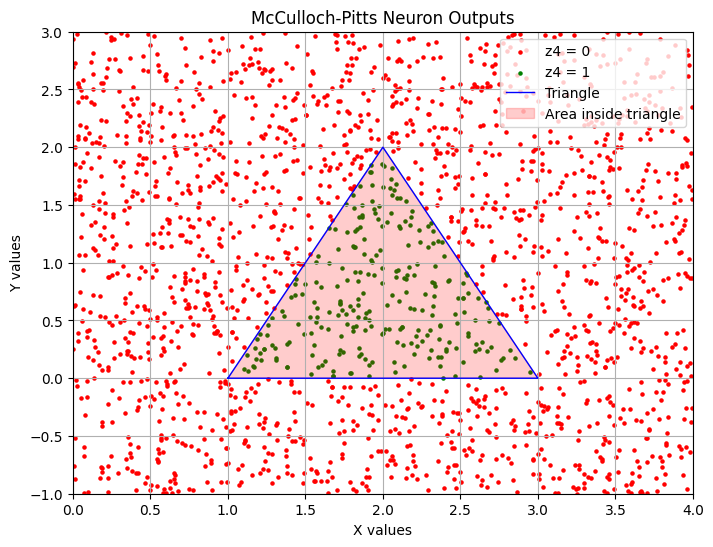

In [4]:
# Generate random data points
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 3, num_points)  # Updated y-axis limits

green_points = []
red_points = []

# Classify points using the Area function
for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value == [0]:  # z4 value is 0
        red_points.append((x_values[i], y_values[i]))
    else:  # z4 value is 1
        green_points.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points
green_x, green_y = zip(*green_points) if green_points else ([], [])
red_x, red_y = zip(*red_points) if red_points else ([], [])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red',s=5, label='z4 = 0')
plt.scatter(green_x, green_y, color='green',s=5, label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

triangle_x = [1, 2, 3, 1]
triangle_y = [0, 2, 0, 0]
plt.plot(triangle_x, triangle_y, color='blue', linewidth=1, label='Triangle')
plt.fill(triangle_x, triangle_y, color='red', alpha=0.2, label='Area inside triangle')

plt.grid(True)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right')

# Save plot as PDF
plt.savefig('c.png', bbox_inches='tight')

plt.show()

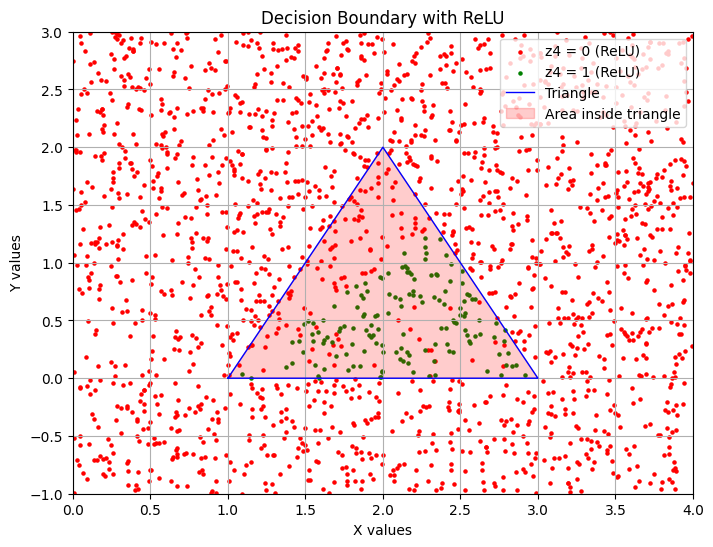

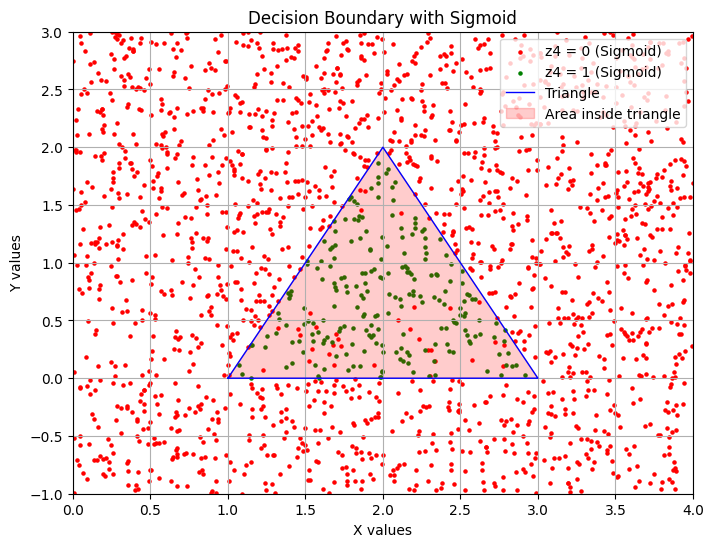

In [5]:
# تابع بررسی قرار گرفتن داخل مثلث
def is_inside_triangle(x, y):
    x1, y1 = 1, 0
    x2, y2 = 2, 2
    x3, y3 = 3, 0
    area_triangle = abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)) / 2.0)
    area1 = abs((x * (y2 - y3) + x2 * (y3 - y) + x3 * (y - y2)) / 2.0)
    area2 = abs((x1 * (y - y3) + x * (y3 - y1) + x3 * (y1 - y)) / 2.0)
    area3 = abs((x1 * (y2 - y) + x2 * (y - y1) + x * (y1 - y2)) / 2.0)
    return area_triangle == (area1 + area2 + area3)

# توابع فعال‌ساز
def relu(x):
    return max(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# تابع تصمیم‌گیری بر اساس ReLU
def Area_relu(x, y):
    if is_inside_triangle(x, y):
        z = relu(x - y)  # اعمال ReLU
        return [1] if z > 1 else [0]  # تصمیم‌گیری بر اساس آستانه
    return [0]

# تابع تصمیم‌گیری بر اساس Sigmoid
def Area_sigmoid(x, y):
    if is_inside_triangle(x, y):
        z = sigmoid(x - y)  # اعمال Sigmoid
        return [1] if z > 0.5 else [0]  # تصمیم‌گیری بر اساس آستانه
    return [0]

# تولید داده‌های تصادفی
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# طبقه‌بندی نقاط با ReLU
green_points_relu = []
red_points_relu = []
for i in range(num_points):
    z4_value = Area_relu(x_values[i], y_values[i])
    if z4_value == [0]:
        red_points_relu.append((x_values[i], y_values[i]))
    else:
        green_points_relu.append((x_values[i], y_values[i]))

# طبقه‌بندی نقاط با Sigmoid
green_points_sigmoid = []
red_points_sigmoid = []
for i in range(num_points):
    z4_value = Area_sigmoid(x_values[i], y_values[i])
    if z4_value == [0]:
        red_points_sigmoid.append((x_values[i], y_values[i]))
    else:
        green_points_sigmoid.append((x_values[i], y_values[i]))

# رسم نمودار ReLU
green_x_relu, green_y_relu = zip(*green_points_relu) if green_points_relu else ([], [])
red_x_relu, red_y_relu = zip(*red_points_relu) if red_points_relu else ([], [])

plt.figure(figsize=(8, 6))
plt.scatter(red_x_relu, red_y_relu, color='red', s=5, label='z4 = 0 (ReLU)')
plt.scatter(green_x_relu, green_y_relu, color='green', s=5, label='z4 = 1 (ReLU)')
triangle_x = [1, 2, 3, 1]
triangle_y = [0, 2, 0, 0]
plt.plot(triangle_x, triangle_y, color='blue', linewidth=1, label='Triangle')
plt.fill(triangle_x, triangle_y, color='red', alpha=0.2, label='Area inside triangle')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Decision Boundary with ReLU')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.show()

# رسم نمودار Sigmoid
green_x_sigmoid, green_y_sigmoid = zip(*green_points_sigmoid) if green_points_sigmoid else ([], [])
red_x_sigmoid, red_y_sigmoid = zip(*red_points_sigmoid) if red_points_sigmoid else ([], [])

plt.figure(figsize=(8, 6))
plt.scatter(red_x_sigmoid, red_y_sigmoid, color='red', s=5, label='z4 = 0 (Sigmoid)')
plt.scatter(green_x_sigmoid, green_y_sigmoid, color='green', s=5, label='z4 = 1 (Sigmoid)')
plt.plot(triangle_x, triangle_y, color='blue', linewidth=1, label='Triangle')
plt.fill(triangle_x, triangle_y, color='red', alpha=0.2, label='Area inside triangle')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Decision Boundary with Sigmoid')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.show()
